In [1]:
# Import necessary libraries
!pip install Pillow
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from google.colab.patches import cv2_imshow


# Q1

## Read 1.jpg image

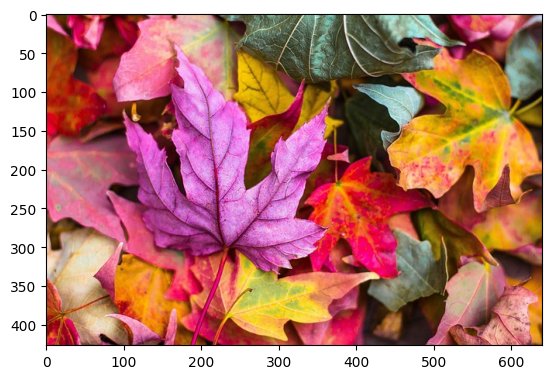

In [2]:
# convert BGR to RGB
image_bgr = cv2.imread('images/1.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


## Q1.1: RGB to CMYK & CMYK to RGB

In [3]:
def RGB_to_CMYK(r, g, b, RGB_SCALE=255, CMYK_SCALE=100):
    R = r / RGB_SCALE
    G = g / RGB_SCALE
    B = b / RGB_SCALE
    K = 1 - max(R, G, B)

    if K == 1:
        C = M = Y = 0
    else:
        C = (1 - K - R) / (1 - K)
        M = (1 - K - G) / (1 - K)
        Y = (1 - K - B) / (1 - K)

    C = round(C * CMYK_SCALE, 2)
    M = round(M * CMYK_SCALE, 2)
    Y = round(Y * CMYK_SCALE, 2)
    K = round(K * CMYK_SCALE, 2)

    return C, M, Y, K

In [4]:
# test for just one pixcel
print(RGB_to_CMYK(255, 150, 100))

(0.0, 41.18, 60.78, 0.0)


##CONVERT CMYK TO RGB:

In [5]:
def CMYK_to_RGB(c, m, y, k, RGB_SCALE = 255, CMYK_SCALE = 100):
  #############
  # Your code #
  C = c / CMYK_SCALE
  M = m / CMYK_SCALE
  Y = y / CMYK_SCALE
  K = k / CMYK_SCALE
  r = round(RGB_SCALE * (1 - C) * (1 - K))
  g = round(RGB_SCALE * (1 - M) * (1 - K))
  b = round(RGB_SCALE * (1 - Y) * (1 - K))
  #############

  return r, g, b


The HSI model represents the Hue, Saturation, and Intensity of a color. Below are the steps for conversion:

Normalize RGB Values: Convert R, G, B, which typically range from 0 to 255, to the range 0-1.
Calculate Intensity (I): This is the average of the normalized RGB values.
Calculate Saturation (S): This depends on the minimum value of the RGB components.
Calculate Hue (H): This involves checking the relationships between the RGB values.

## Q1.2: RGB to HSI

In [6]:
def RGB_to_HSI(r, g, b):
    r /= 255.0
    g /= 255.0
    b /= 255.0
    i = (r + g + b) / 3
    min_val = min(r, g, b)

    if i == 0:
        s = 0
    else:
        s = 1 - (min_val / i)
    if r == g == b:
        h = 0
    else:
        numerator = 0.5 * ((r - g) + (r - b))
        denominator = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
        theta = np.arccos(np.clip(numerator / denominator, -1, 1))
        if b <= g:
            h = theta
        else:
            h = 2 * math.pi - theta
        # h = h * (360 / (2 * math.pi))
    h = np.degrees(h)

    return h, s, i


In [7]:
# Example usage
r, g, b = 200, 200, 0  # Pure red
h, s, i = RGB_to_HSI(r, g, b)
print(f"Hue: {h:.2f}, Saturation: {s:.2f}, Intensity: {i:.2f}")

Hue: 60.00, Saturation: 1.00, Intensity: 0.52


## Show result image for all functions

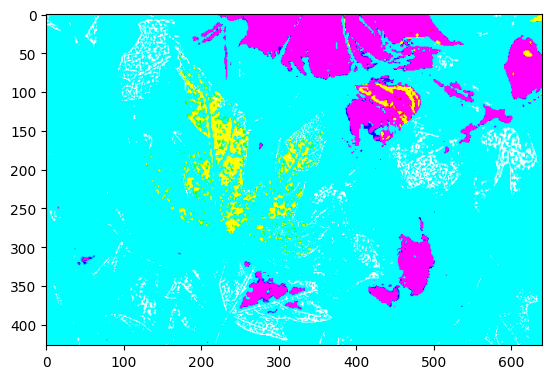

In [8]:
# utilize RGB_TO_CMYK for every pixcel of picture.
def apply_rgb_to_cmyk(image):
    height, width, _ = image.shape
    CMYK = np.zeros((height, width, 4), dtype=np.float32)
    for i in range(height):
        for j in range(width):
            r, g, b = image[i, j]
            CMYK[i, j] = RGB_to_CMYK(r, g, b)
    return CMYK
image_path = 'images/1.jpg'
image = Image.open(image_path)
image_np = np.array(image)
cmyk_image = apply_rgb_to_cmyk(image_np)
plt.imshow(cmyk_image)

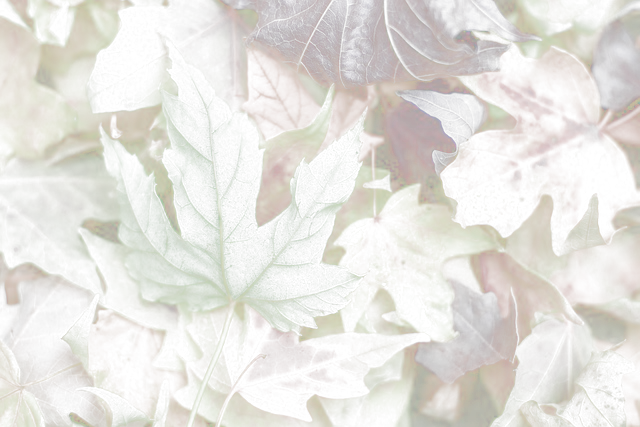

In [9]:
image_path = 'images/1.jpg'
image = Image.open(image_path)
image_np = np.array(image)
cmyk_image = apply_rgb_to_cmyk(image_np)
cv2_imshow(cmyk_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
# to show the cmyk image
def create_cmyk_image(cmyk_np):
    cmyk_uint8 = np.clip(cmyk_np, 0, 100).astype('uint8')
    cmyk_image = Image.fromarray(cmyk_uint8, 'CMYK')
    cmyk_image.show()
    cmyk_image.save('RGB_to_CMYK.jpg')
    print("your result saved in RGB_TO_CMYK.jpg")

create_cmyk_image(cmyk_image)


your result saved in RGB_TO_CMYK.jpg


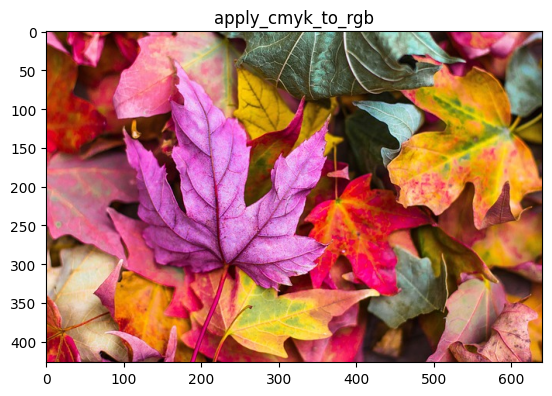

In [11]:
def apply_cmyk_to_rgb(image):
  image_rgb_from_cmyk = np.zeros_like(image_rgb, dtype=np.uint8)
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          c, m, y, k = image[i, j]
          r, g, b = CMYK_to_RGB(c, m, y, k)
          image_rgb_from_cmyk[i, j] = [r, g, b]
  return image_rgb_from_cmyk
image_rgb = apply_cmyk_to_rgb(cmyk_image)
plt.title('apply_cmyk_to_rgb')
plt.imshow(image_rgb)
plt.show()

HSI image saved as RGB_to_HSI.jpg


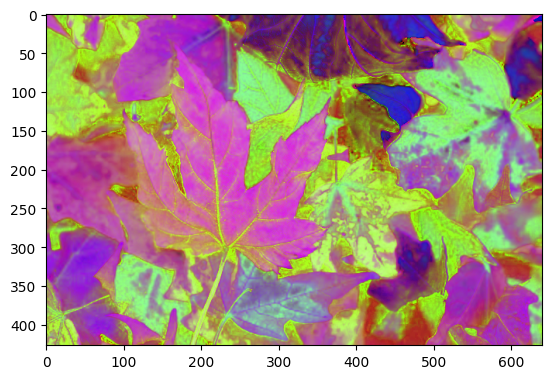

In [12]:
def apply_RGB_to_HSI(image_path):
    rgb_image = cv2.imread(image_path)
    # Convert each pixel to HSI
    hsi_image = np.zeros_like(rgb_image, dtype=np.float32)
    for row in range(rgb_image.shape[0]):
        for col in range(rgb_image.shape[1]):
            r, g, b = rgb_image[row, col]
            h, s, i = RGB_to_HSI(r, g, b)
            hsi_image[row, col] = [h, s, i]
    hsi_image[..., 0] = hsi_image[..., 0] / 360
    # Save the HSI image as a JPEG file
    hsi_image_path = "RGB_to_HSI.jpg"
    cv2.imwrite(hsi_image_path, hsi_image)
    plt.imshow(hsi_image, cmap = 'hsv', vmin = 0, vmax = 255)
    print(f"HSI image saved as {hsi_image_path}")
image_path = "images/1.jpg"
apply_RGB_to_HSI(image_path)

# Q2

## Read images

## Find differences between two pictures

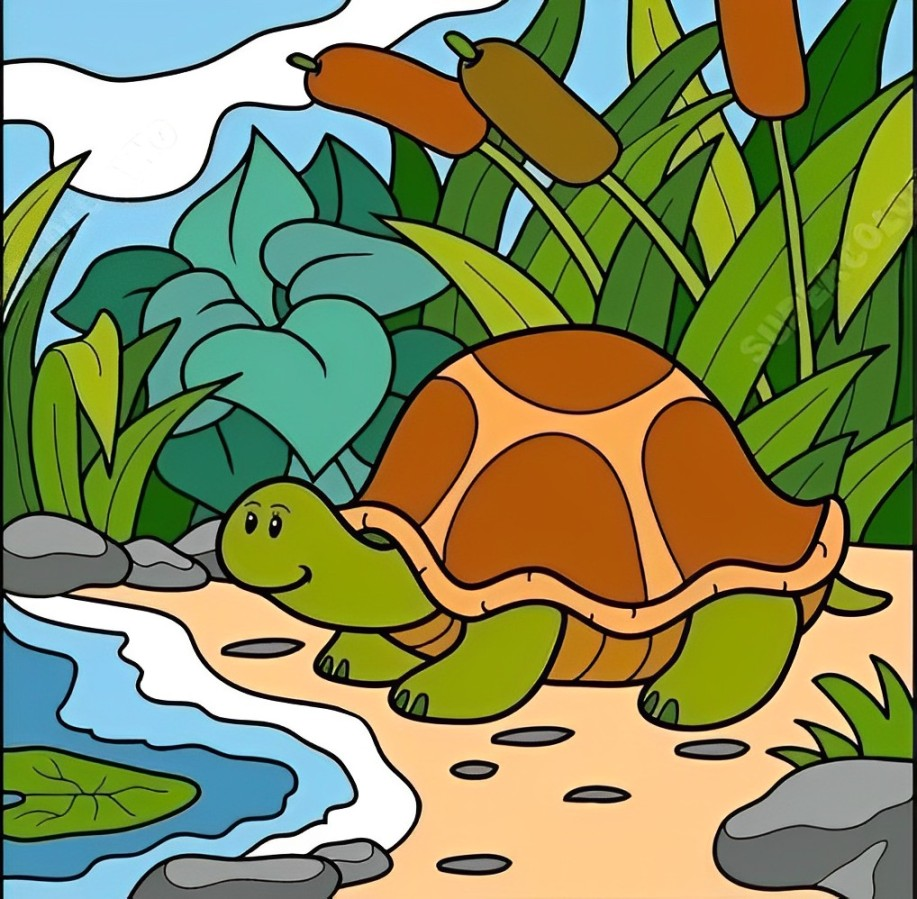

In [13]:
image2_path = 'images/2.jpg'
image3_path = 'images/3.jpg'
image2 = cv2.imread(image2_path)
image3 = cv2.imread(image3_path)
cv2_imshow(image2)

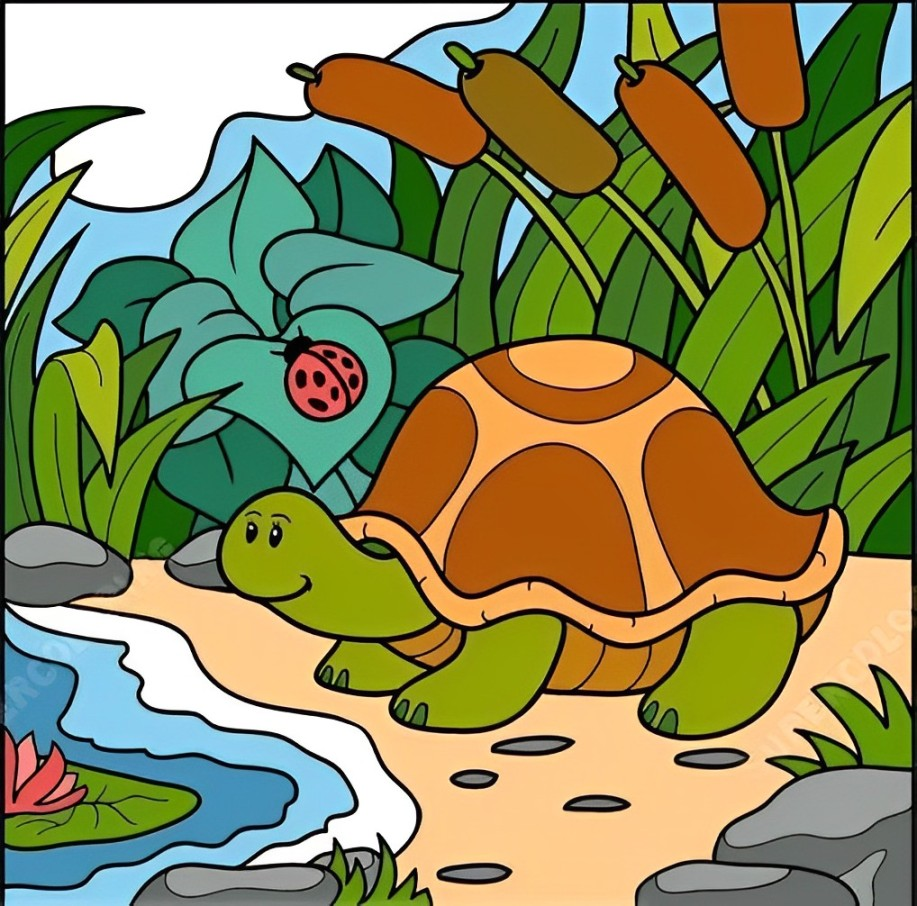

In [14]:
cv2_imshow(image3)

In [27]:
def diff(image1, image2):
    h1 = int(image1.shape[1])
    w1 = int(image1.shape[0])
    h2 = int(image1.shape[1])
    w2 = int(image2.shape[0])
    new_height = min(h1, h2)
    new_width = min(w1, w2)
    result = np.zeros((new_width ,new_height, 3), np.uint8)
    result[:, :, 0] = image1[:new_width, :new_height]
    result[:, :, 1] = image2[:new_width, :new_height]
    # result[:, :, 2] = image2[:new_width, :new_height]
    result[:, :, 2] = 0

    return result


In [31]:
def diff1(image1, image2):
    h1 = int(image1.shape[1])
    w1 = int(image1.shape[0])
    h2 = int(image1.shape[1])
    w2 = int(image2.shape[0])
    new_height = min(h1, h2)
    new_width = min(w1, w2)
    result = np.zeros((new_width ,new_height, 3), np.uint8)
    result[:, :, 1] = image1[:new_width, :new_height]
    result[:, :, 0] = image2[:new_width, :new_height]
    result[:, :, 2] = image2[:new_width, :new_height]

    return result


## Show result

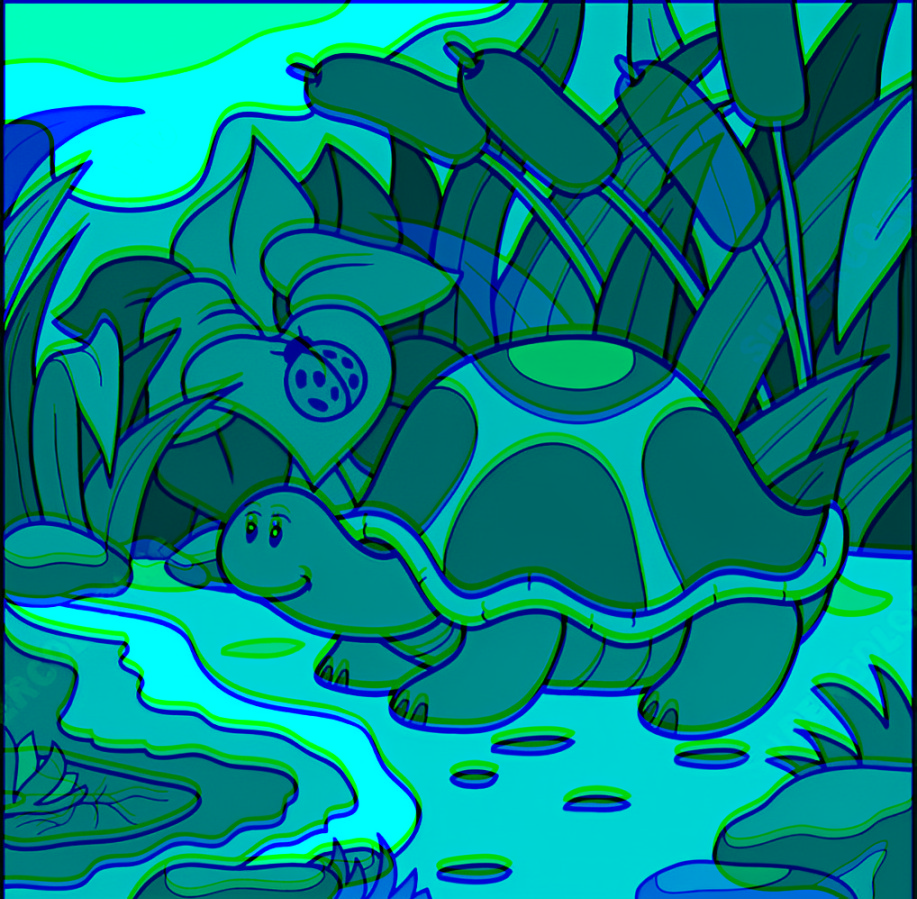

In [32]:
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread(image3_path, cv2.IMREAD_GRAYSCALE)
difference_image = diff(image2, image3)
cv2_imshow(difference_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

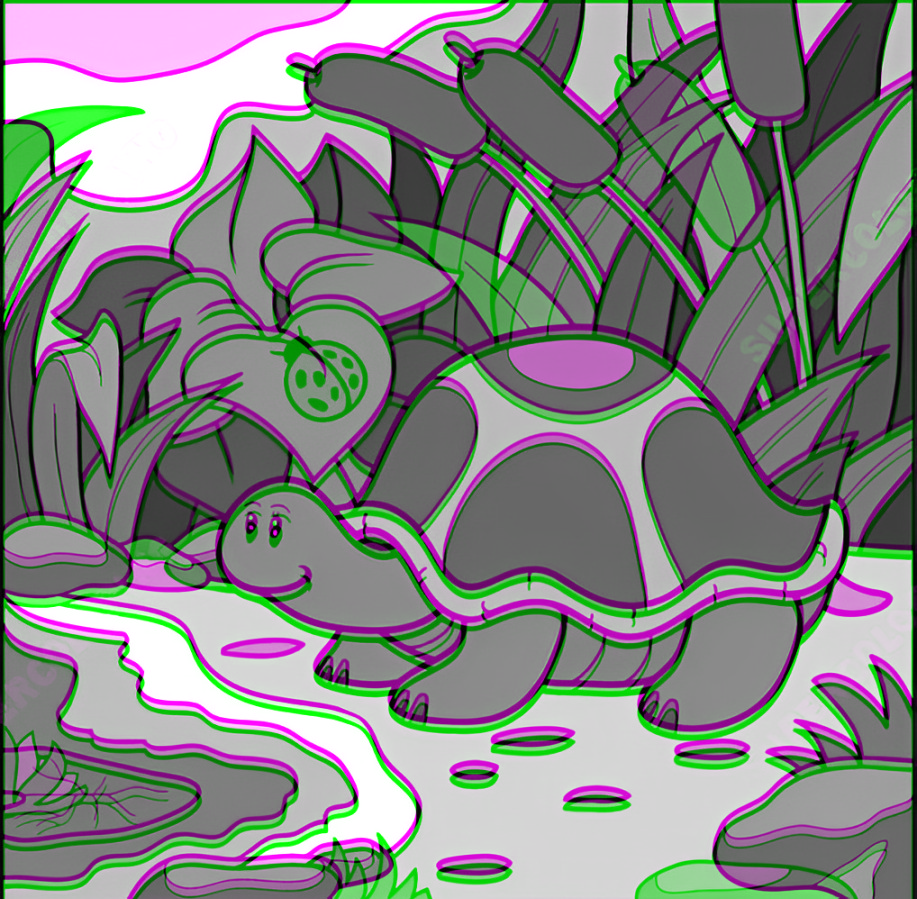

In [33]:
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread(image3_path, cv2.IMREAD_GRAYSCALE)
difference_image = diff1(image2, image3)
cv2_imshow(difference_image)

cv2.waitKey(0)
cv2.destroyAllWindows()